<a href="https://colab.research.google.com/github/Anshika91/Deep_Learning/blob/main/CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

implemnting CNN Architecture

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import*
from keras.models import*
from keras import Sequential 
from keras.layers import Conv2D 
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
model=Sequential()

In [3]:
model.add(Conv2D(64,kernel_size = 7, padding = 'same', input_shape = [28,28,1]))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(128,kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(128,kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(256,kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(256,kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [4]:
tf.random.set_seed(221)
np.random.seed(221)

In [5]:
data = tf.keras.datasets.fashion_mnist

In [6]:
(train_img,train_lbl),(test_img,test_lbl) = data.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [7]:
len(train_img)

60000

In [8]:
len(test_img)

10000

In [9]:
train_img.shape

(60000, 28, 28)

In [10]:
test_img.shape

(10000, 28, 28)

In [11]:
train_img = train_img.reshape(60000,28,28,1)

In [12]:
#scale 
train_img = train_img/255.0

In [13]:
test_img = test_img.reshape(10000,28,28,1)

In [14]:
#scale
test_img = test_img/255.0

In [15]:
train_lbl_5 = (train_lbl == 5)

In [16]:
test_lbl_5 = (test_lbl == 5)

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'SGD', metrics ='accuracy')

In [18]:
history = model.fit(train_img,train_lbl,epochs=10,validation_data = (test_img,test_lbl))

Epoch 1/10
1875/1875 [==============================] - 30s 7ms/step - loss: 0.8680 - accuracy: 0.6797 - val_loss: 0.6293 - val_accuracy: 0.7638
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4879 - accuracy: 0.8209 - val_loss: 0.4466 - val_accuracy: 0.8354
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4079 - accuracy: 0.8493 - val_loss: 0.4065 - val_accuracy: 0.8512
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3652 - accuracy: 0.8652 - val_loss: 0.4057 - val_accuracy: 0.8502
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3377 - accuracy: 0.8754 - val_loss: 0.3693 - val_accuracy: 0.8610
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3163 - accuracy: 0.8816 - val_loss: 0.3499 - val_accuracy: 0.8718
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2990 - accuracy: 0.8898 - val_loss: 0.3217 - val_ac

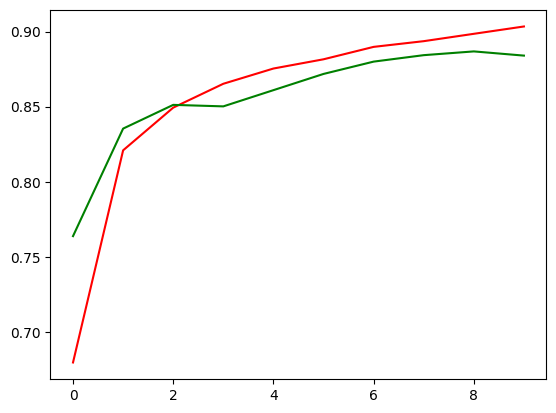

In [19]:
plt.plot(history.history['accuracy'],'r-')
plt.plot(history.history['val_accuracy'],'g-')
plt.show()

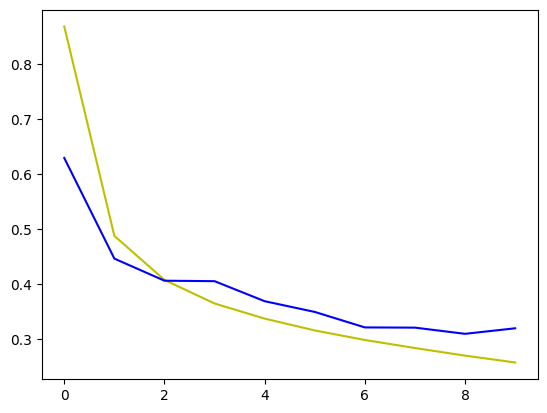

In [20]:
plt.plot(history.history['loss'],'y-')
plt.plot(history.history['val_loss'],'b-')
plt.show()